# TITANIC DISASTER PROBLEM FROM KAGGLE

    A personal solution to this problem.
    
    PROJECT WORK FOR ALGORITHM DESIGN - CSE 3131

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Getting the training and test set
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
# Taking a look at the training set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Getting some detailed info about the training set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### We can see that the 'Age' column, 'Cabin' column and 'Embarked' column have some missing values.

---

### Visual Analysis of some feature columns

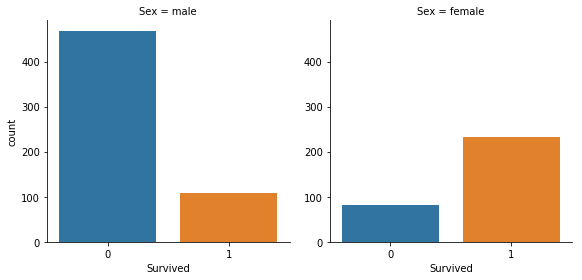

In [5]:
sns.factorplot(x = 'Survived', col = 'Sex', kind = 'count', data = train)
plt.show()

Clearly females have a higher likelihood of survival

In [6]:
# Calculating the percentage of female survival
train[train.Sex == 'female'].Survived

1      1
2      1
3      1
8      1
9      1
10     1
11     1
14     0
15     1
18     0
19     1
22     1
24     0
25     1
28     1
31     1
32     1
38     0
39     1
40     0
41     0
43     1
44     1
47     1
49     0
52     1
53     1
56     1
58     1
61     1
      ..
807    0
809    1
813    0
816    0
820    1
823    1
829    1
830    1
835    1
842    1
849    1
852    0
853    1
854    0
855    1
856    1
858    1
862    1
863    0
865    1
866    1
871    1
874    1
875    1
879    1
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [7]:
# Since length is 314, we have to divide the number of survived females by 314
females_survived = train[train.Sex == 'female'].Survived.sum()/314
print(round(females_survived * 100))

74


In [8]:
# Calculating the percentage of males survived
train[train.Sex == 'male'].Survived

0      0
4      0
5      0
6      0
7      0
12     0
13     0
16     0
17     1
20     0
21     1
23     1
26     0
27     0
29     0
30     0
33     0
34     0
35     0
36     1
37     0
42     0
45     0
46     0
48     0
50     0
51     0
54     0
55     1
57     0
      ..
840    0
841    0
843    0
844    0
845    0
846    0
847    0
848    0
850    0
851    0
857    1
859    0
860    0
861    0
864    0
867    0
868    0
869    1
870    0
872    0
873    0
876    0
877    0
878    0
881    0
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64

In [9]:
# Since length is 577, we have to divide the number of survived females by 577
males_survived = train[train.Sex == 'male'].Survived.sum()
print(round(males_survived/577 * 100))

19


#### Approximately 74% females and 19% males survived. Male survival percentage is much lower than females!

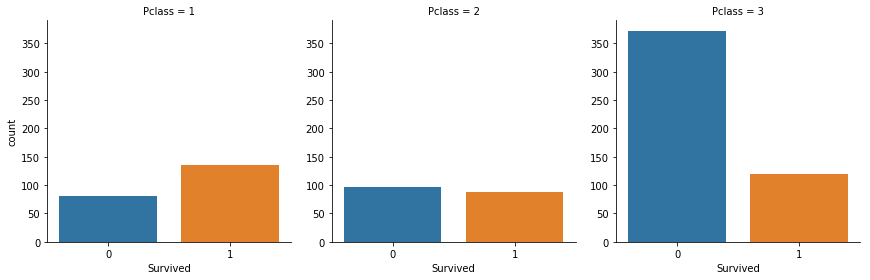

In [10]:
# Using seaborn to build bar plots of the feature 'Survived' over 'Pclass'
# Gives us an idea of survival rates of 'Pclass' feature column

sns.factorplot(x = 'Survived', col = 'Pclass', kind = 'count', data = train)
plt.show()

We can see that the passengers on the first class were the most likely to survive.

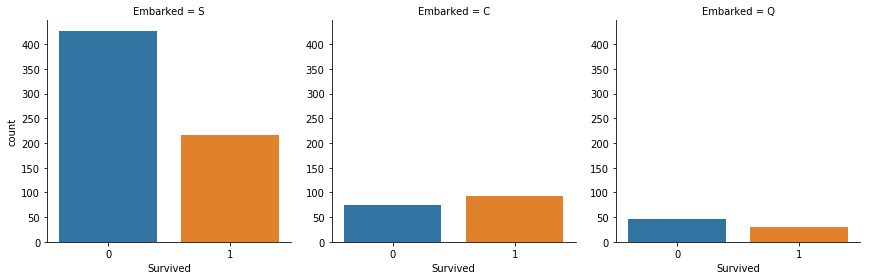

In [11]:
# Using seaborn to build bar plots of the feature 'Survived' over 'Embarked'
# Gives us an idea of survival rates of 'Pclass' feature column
sns.factorplot(x = 'Survived', col = 'Embarked', kind = 'count', data = train);
plt.show()

In [12]:
# Using seaborn to build bar plots of the feature 'Survived' over 'Fare'
sns.factorplot(x = 'Survived', col = 'Fare', kind = 'count', data = train)
plt.show()

ValueError: Image size of 71424x288 pixels is too large. It must be less than 2^16 in each direction.

### We can see that the image size is too large. We therefore have to use another method to visualize the 'Fare' feature.

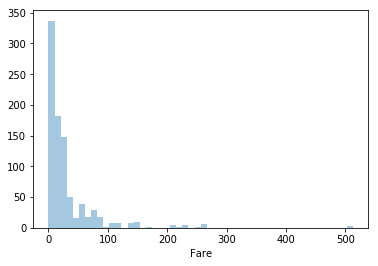

In [14]:
# Plotting a histogram of 'Fare' column from the training set
sns.distplot(train.Fare, kde = False)
plt.show()

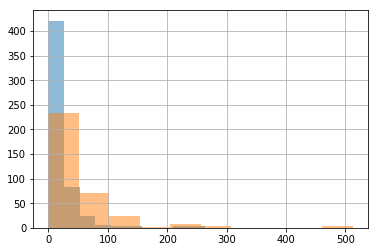

In [15]:
# Plotting 'Fare' and 'Survived' together to get an idea of how survival is related to the fare value.
train.groupby('Survived').Fare.hist(alpha=0.5)
plt.show()

#### Those who paid more, had higher chances of survival!

---

## Imputing missing values and creating my Machine Learning model

---

##### A final check on the 'Age' feature column.

Obviously 'Age' feature column has an impact on the survival. But, it has got some missing values. I can fill those with either the mean of the median of the same column. But before doing that, I need to check the distribution of the 'Age' feature column in order to decide which one would be suitable.

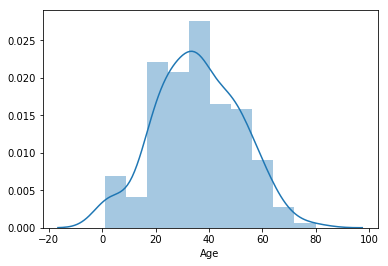

In [16]:
# Using seaborn to plot a histogram of 'Age' column and check the distribution of the values.

sns.distplot(train.dropna().Age)    # Missing values have to be dropped else error will pop out.
plt.show()

We can see that the 'Age' feature column is clearly right skewed. So mean won't be an appropriate choice. Hence, I shall fill the missing values with the median of the column.

---

In [17]:
# Storing the response data for later use
train_survived = train.Survived

# Concatenating the training and the test sets to impute the missing values and work on a combined data
train_test_data = pd.concat([train.drop(['Survived'], axis = 1), test])

# Checking the info of the new concatenated data
train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [18]:
# Filling the 'Age' and 'Fare' feature columns with the median values

train_test_data['Age'] = train_test_data.Age.fillna(train_test_data.Age.median())
train_test_data['Fare'] = train_test_data.Fare.fillna(train_test_data.Fare.median())

# Checking the info again to see if the missing values have been filled up.
train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


The missing values of 'Age' and 'Fare' columns have now been filled up. Now we just have to take care of the 'Cabin' and 'Embarked' feature columns.

Since, the 'Cabin' feature column has got only 295 filled in columns, I am gonna ignore that column for this model.

In [19]:
# Removing the 'Cabin' feature column
train_test_data.drop(['Cabin'], axis = 1, inplace = True)

train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [20]:
# Filling the 'Embarked' feature column with the most frequent value

train_test_data = train_test_data.fillna(train_test_data['Embarked'].value_counts().index[0])

train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


ALL THE THINGS HAVE BEEN TAKEN CARE OF NOW!

In [21]:
# Now we encode the data by making dummy variables of the required feature columns as Categorical values might not be 
# accepted by the machine learning model

# 'Embarked' and 'Sex' are the two columns am focusing on.

train_test_data = pd.get_dummies(train_test_data, columns = ['Sex'], drop_first=True)
train_test_data = pd.get_dummies(train_test_data, columns = ['Embarked'], drop_first=True)

# Dropping one column from each of these as we might get caught in the 'DUMMY VARIABLE TRAP'. So to avoid that,
# we have to take n - 1 columns.

train_test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.503186,0.498854,0.385027,33.281086,0.644003,0.093965,0.699771
std,378.020061,0.837836,12.905241,1.041658,0.865560,51.741500,0.478997,0.291891,0.458533
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


We can see that the 'Sex' feature column and the 'Embarked' feature column have been divided into 2 and 3 separate dummy variable column each and have been sliced off of one column each to avoid the DUMMY VARIABLE TRAP.

Using get_dummies() which is a pandas function, the 'Sex' column was divided into 'Sex_Male' and 'Sex_Female' and the later was discarded. Similarly, 'Embarked'column was divided into 'Embarked_Q', 'Embarked_S' and 'Embarked_C' and 'Embarked_C' was sliced off.

In [22]:
# Now, I am selecting the columns on which I want to build my Machine Learning model.
# Since am a beginner, I thought PassengerId might not have much effect on the prediction, althought i might be wrong.

train_test_data = train_test_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]

# Checking if all is good!
train_test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


All good!

In [23]:
# Final check on the info and getting the description

train_test_data.info()
train_test_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Pclass        1309 non-null int64
Age           1309 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Fare          1309 non-null float64
Sex_male      1309 non-null uint8
Embarked_Q    1309 non-null uint8
Embarked_S    1309 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 65.2 KB


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,29.503186,0.498854,0.385027,33.281086,0.644003,0.093965,0.699771
std,0.837836,12.905241,1.041658,0.865560,51.741500,0.478997,0.291891,0.458533
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


---

### Building the 'Support Vector Machine Classifier.

In [24]:
# Splitting the dataset back into the training and test sets and then using scikit learn library to convert them into arrays
X = train_test_data.iloc[:891].values
y = train_survived.values
X_test = train_test_data.iloc[891:].values

X, y, X_test

(array([[  3.,  22.,   1., ...,   1.,   0.,   1.],
        [  1.,  38.,   1., ...,   0.,   0.,   0.],
        [  3.,  26.,   0., ...,   0.,   0.,   1.],
        ..., 
        [  3.,  28.,   1., ...,   0.,   0.,   1.],
        [  1.,  26.,   0., ...,   1.,   0.,   0.],
        [  3.,  32.,   0., ...,   1.,   1.,   0.]]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 

In [25]:
# Importing the classifier and fitting it to the training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
# Predicting the test set results and then formatting the test set to hold only the required two columns.
y_pred = classifier.predict(X_test)

test['Survived'] = y_pred
test = test[['PassengerId', 'Survived']]

In [28]:
# Converting the result to a csv file.
test.to_csv('titanic_submission.csv', index = False)

### Final comments

This project's generated csv file was submitted to kaggle.com and it generated a score of 0.76555 which is equavelent to nearly 76.55%.